In [183]:
import os, sys, numpy, pylab, importlib, pickle, gzip, json, copy, matplotlib
from covid19_stats.engine import core, gis, viz
from covid19_stats import COVID19Database
from matplotlib.patches import Polygon, Rectangle, PathPatch
from itertools import chain
from nprstuff.core import autocrop_image
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm, to_rgba
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.axes import Axes
#
%matplotlib inline

Now let's try the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) functionality, with examples of adding Matplotlib patches given by [this article](https://scitools.org.uk/cartopy/docs/latest/gallery/favicon.html?highlight=add_patch) and by [that article](https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html).

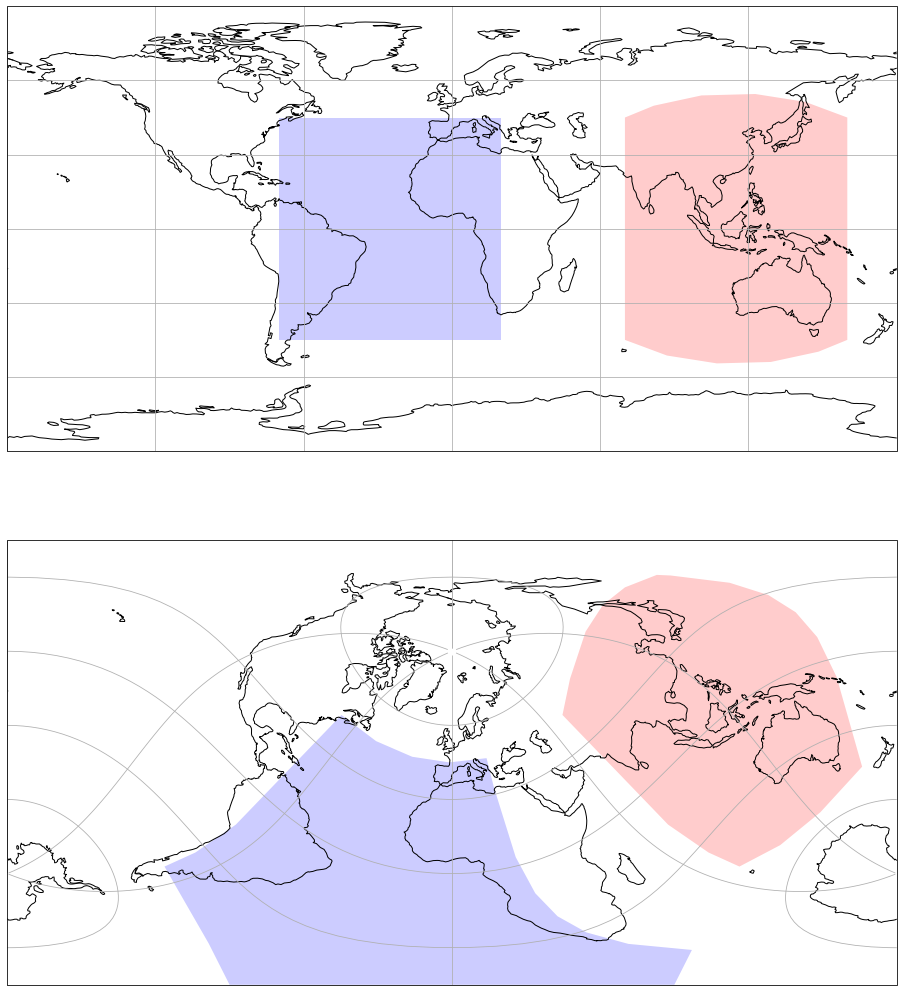

In [80]:
import cartopy.crs as ccrs
desired_projections = [ccrs.PlateCarree(),
                       ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)]
fig = pylab.figure()
fig.set_size_inches([18,18])
for plot_num, desired_proj in enumerate(desired_projections):
    ax = fig.add_subplot(2,1,plot_num+1, projection=desired_proj)
    ax.set_global()
    ax.add_patch(Rectangle(xy=[-70, -45], width=90, height=90,
                           facecolor='blue', alpha=0.2,
                           transform=ccrs.PlateCarree()))

    ax.add_patch(Rectangle(xy=[70, -45], width=90, height=90,
                           facecolor='red', alpha=0.2,
                           transform=ccrs.Geodetic()))
    ax.gridlines()
    ax.coastlines()

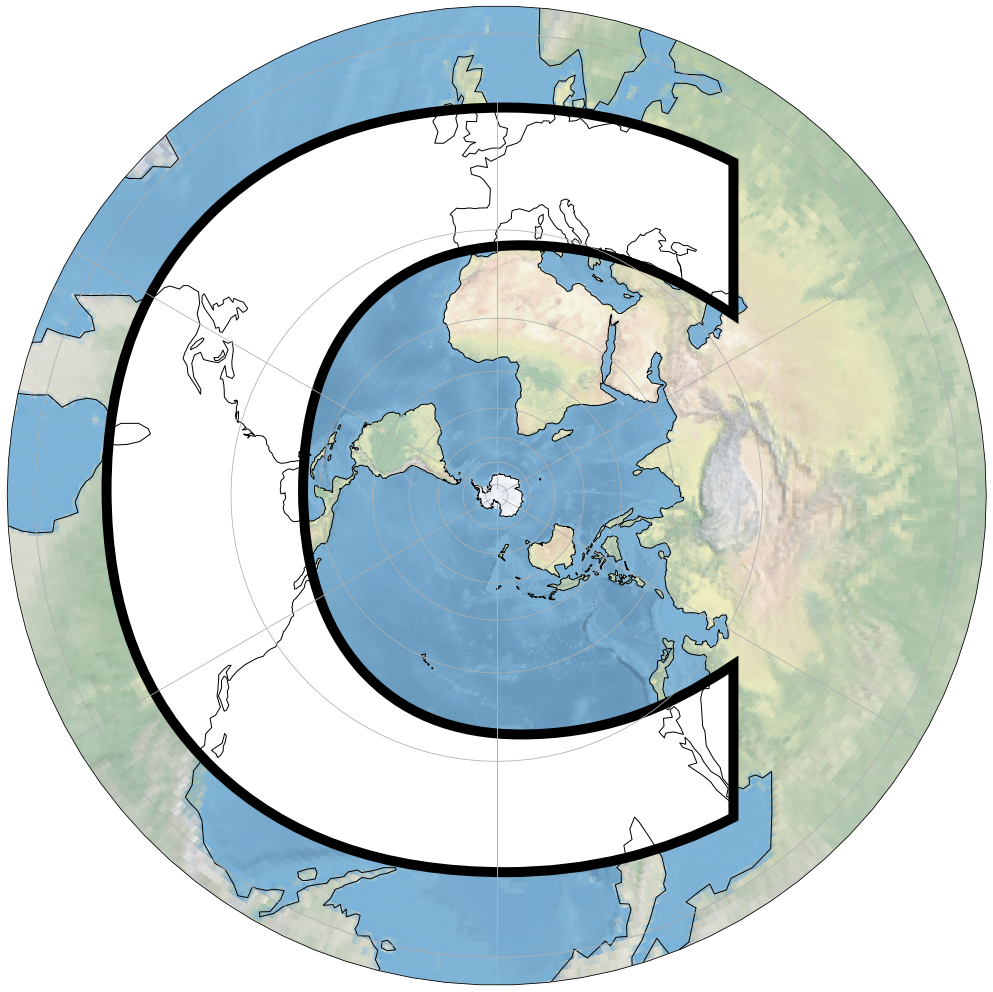

In [24]:
from matplotlib.font_manager import FontProperties
from matplotlib.textpath import TextPath
fig = pylab.figure( )
fig.set_size_inches([18,18])
ax = fig.add_subplot(111, projection = ccrs.SouthPolarStereo())
ax.coastlines( )
ax.gridlines( )
ax.stock_img( )
#
## Generate a matplotlib path representing the character "C".
fp = FontProperties(family='Bitstream Vera Sans', weight='bold')
logo_path = TextPath((-4.5e7, -3.7e7), 'C', size=1, prop=fp)
#
## Scale the letter up to an appropriate X and Y scale.
logo_path._vertices *= numpy.array([103250000, 103250000])
#
## Add the path as a patch, drawing black outlines around the text.
patch = PathPatch(logo_path, facecolor='white', edgecolor='black', linewidth=10, transform=ccrs.SouthPolarStereo())
ax.add_patch( patch )

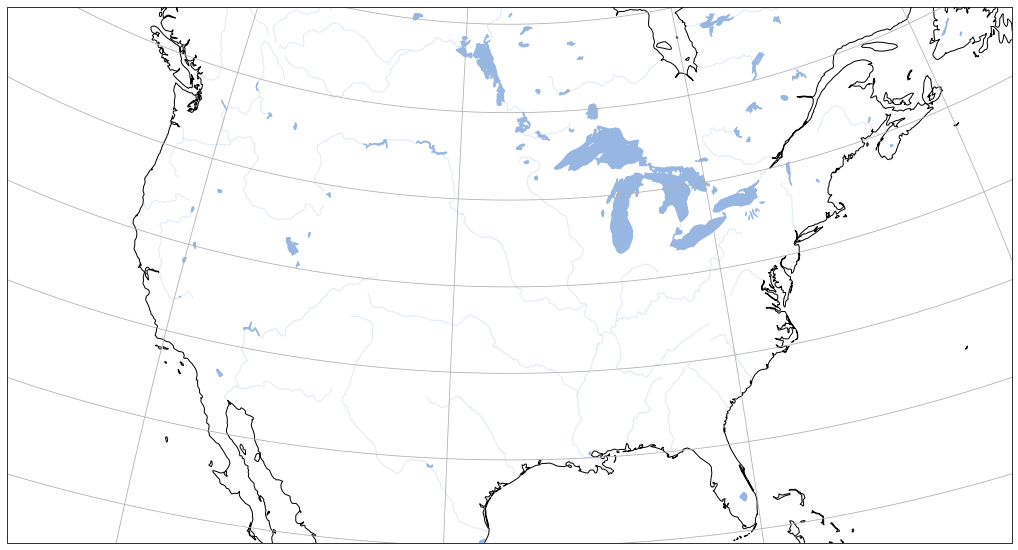

In [74]:
import cartopy.feature as cfeature
fig = pylab.figure( )
fig.set_size_inches([18,18])
min_lng, min_lat, max_lng, max_lat = inc_data_conus['bbox']
lng_center = 0.5 * ( min_lng + max_lng )
lat_center = 0.5 * ( min_lat + max_lat )
lng_delta = 1.05 * ( max_lng - min_lng ) * 0.5
lat_delta = 1.25 * ( max_lat - min_lat ) * 0.5
ax = fig.add_subplot( projection = ccrs.Stereographic( central_latitude=lat_center, central_longitude=lng_center) )
ax.gridlines( )
ax.coastlines( )
ax.set_extent( (lng_center - lng_delta, lng_center + lng_delta, lat_center - lat_delta, lat_center + lat_delta ) )
ax.add_feature( cfeature.LAKES)
ax.add_feature( feat_rivers )

In [62]:
cfeature.RIVERS.__dict__

{'_crs': <cartopy.crs.PlateCarree at 0x7f97689daae0>,
 '_kwargs': {'edgecolor': array([0.59375   , 0.71484375, 0.8828125 ]),
  'facecolor': 'never'},
 'category': 'physical',
 'name': 'rivers_lake_centerlines',
 'scaler': <cartopy.feature.AdaptiveScaler at 0x7f971c4e1100>}

In [31]:
inc_data_conus = pickle.load( gzip.open( 'data_conus_LATEST.pkl.gz', 'rb'))

In [33]:
inc_data_conus['bbox']

(-124.763068, 24.523096, -66.949895, 49.384358)

In [70]:
feat_rivers = copy.deepcopy( cfeature.RIVERS )

In [79]:
feat_rivers._kwargs['edgecolor'] = numpy.concatenate([ cfeature.COLORS['water'], [0.5,] ])

In [119]:
feat_rivers.__dict__

{'_crs': <cartopy.crs.PlateCarree at 0x7f9716605180>,
 '_kwargs': {'edgecolor': array([0.59375   , 0.71484375, 0.8828125 , 0.5       ]),
  'facecolor': 'never'},
 'category': 'physical',
 'name': 'rivers_lake_centerlines',
 'scaler': <cartopy.feature.AdaptiveScaler at 0x7f97165ad490>}

In [77]:
numpy.concatenate([ cfeature.COLORS['water'], [0.3,] ])

array([0.59375   , 0.71484375, 0.8828125 , 0.3       ])

In [146]:
from covid19_stats.engine import viz
importlib.reload( viz )

<module 'covid19_stats.engine.viz' from '/mnt/software/sources/pythonics/covid19_stats/covid19_stats/engine/viz.py'>

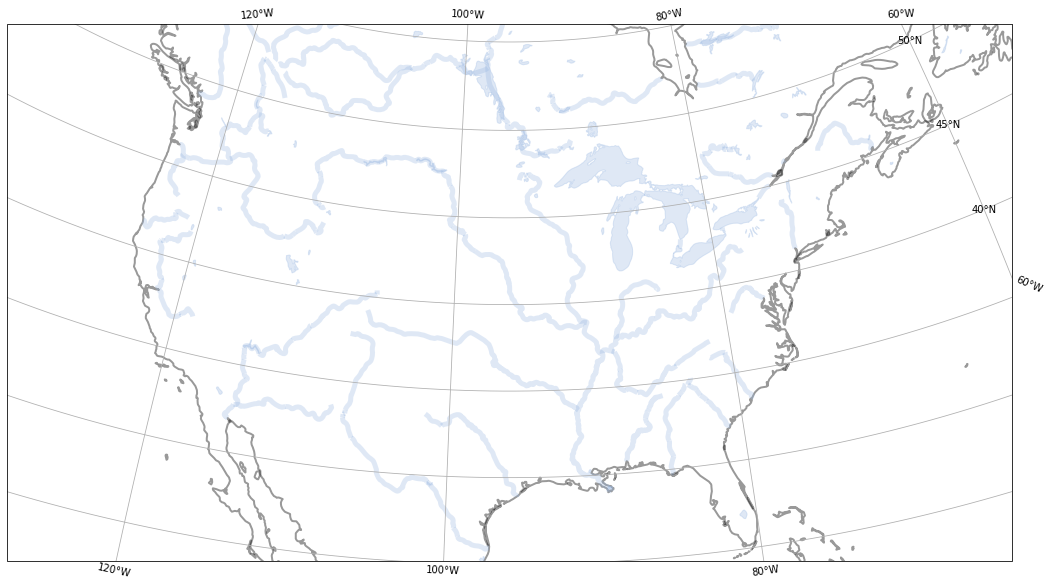

In [131]:
fig = pylab.figure( )
fig.set_size_inches([18,18])
bbox = inc_data_conus['bbox']
ax = viz.create_and_draw_fromfig( fig, bbox, mult_bounds_lat=1.25)

In [152]:
inc_data_nyc = core.get_incident_data( core.get_msa_data( 'nyc') )

In [153]:
inc_data_nyc['boundaries'].keys()

dict_keys(['34035', '34003', '36119', '34025', '42103', '34029', '34031', '00001', '36059', '34019', '34039', '34037', '34027', '34013', '36079', '34017', '34023', '36103', '36087'])

In [143]:
inc_data_bayarea['boundaries']['06069'][0][0,:]

array([-121.644001,   36.893996])

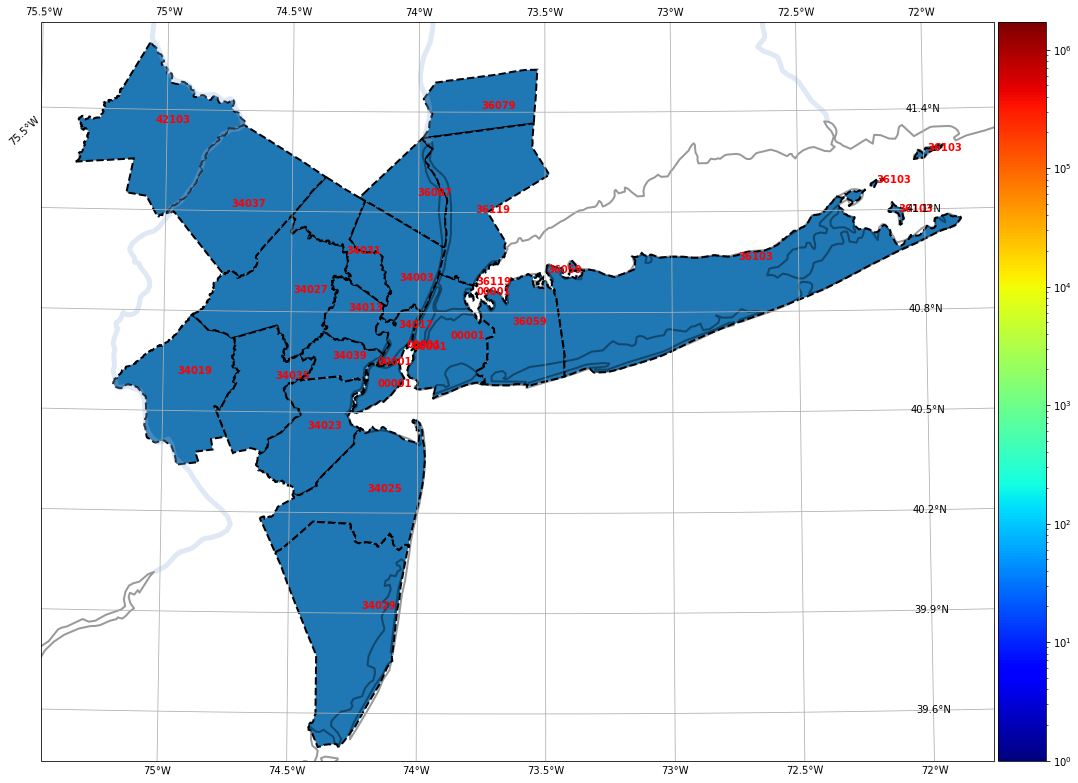

In [186]:
from covid19_stats.engine import viz
importlib.reload( viz )
fig = pylab.figure( )
fig.set_size_inches([18,18])
ax = viz.display_fips_cartopy( inc_data_nyc['boundaries'].keys(), fig )
divider = make_axes_locatable( ax )
cax = divider.append_axes( 'right', size = '5%', pad = 0.05, axes_class = matplotlib.axes.Axes )
cbar = fig.colorbar( sm, cax = cax )

In [160]:
sm = ScalarMappable( norm = LogNorm( 1.0, 1.7e6 ), cmap = 'jet' )

In [161]:
sm

In [164]:
divider = make_axes_locatable( ax )

In [171]:
cbar = fig.colorbar( sm, ax = ax)

In [172]:
cbar

In [173]:
fig.show( )